In [91]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Analysis of Single/Multi Branch Architectures

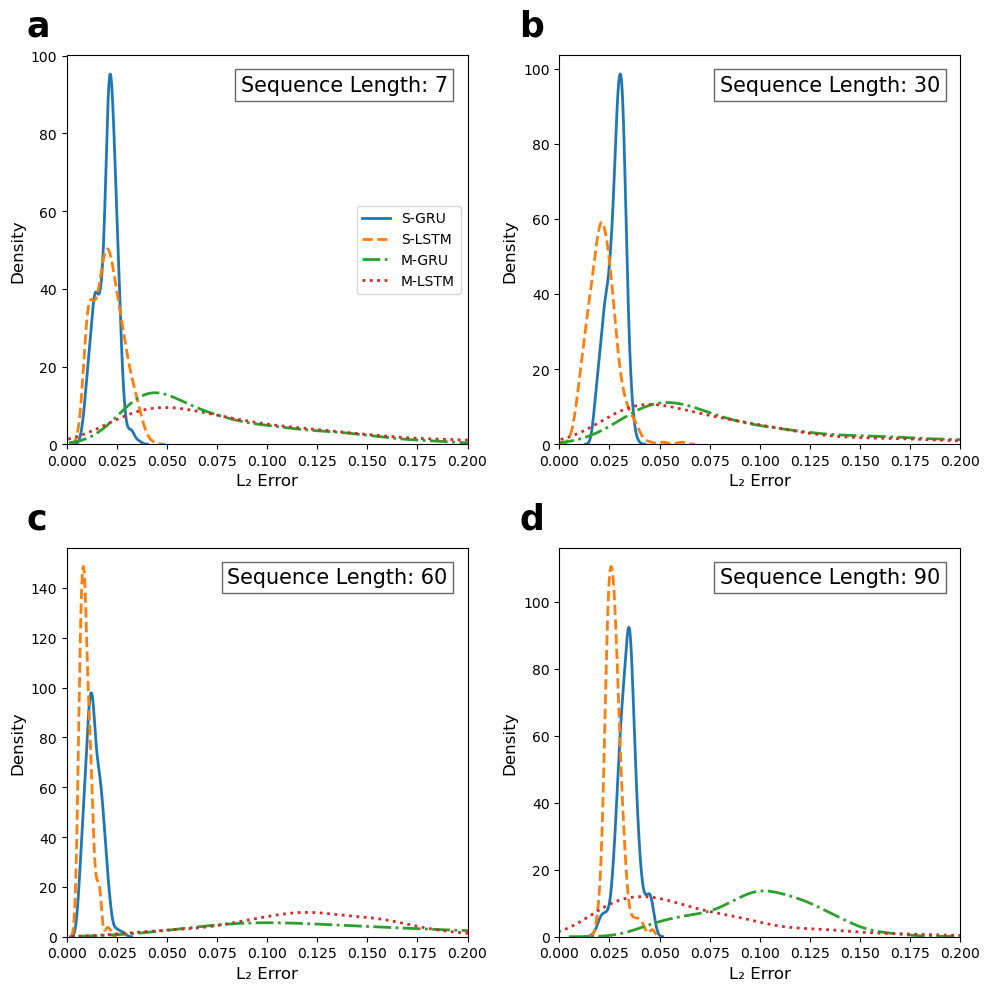

In [111]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data directories
sdata_dir = 'single_branch/array/'
mdata_dir = 'multi_branch/array/'

# Load single-branch GRU/LSTM results
sgru_7 = np.load(sdata_dir + 'gru_window_7_results.npy')[:, 3]
sgru_30 = np.load(sdata_dir + 'gru_window_30_results.npy')[:, 3]
sgru_60 = np.load(sdata_dir + 'gru_window_60_results.npy')[:, 3]
sgru_90 = np.load(sdata_dir + 'gru_window_90_results.npy')[:, 3]

slstm_7 = np.load(sdata_dir + 'lstm_window_7_results.npy')[:, 3]
slstm_30 = np.load(sdata_dir + 'lstm_window_30_results.npy')[:, 3]
slstm_60 = np.load(sdata_dir + 'lstm_window_60_results.npy')[:, 3]
slstm_90 = np.load(sdata_dir + 'lstm_window_90_results.npy')[:, 3]

# Load multi-branch GRU/LSTM results
mgru_7 = np.load(mdata_dir + 'gru_window_7_results.npy')[:, 3]
mgru_30 = np.load(mdata_dir + 'gru_window_30_results.npy')[:, 3]
mgru_60 = np.load(mdata_dir + 'gru_window_60_results.npy')[:, 3]
mgru_90 = np.load(mdata_dir + 'gru_window_90_results.npy')[:, 3]

mlstm_7 = np.load(mdata_dir + 'lstm_window_7_results.npy')[:, 3]
mlstm_30 = np.load(mdata_dir + 'lstm_window_30_results.npy')[:, 3]
mlstm_60 = np.load(mdata_dir + 'lstm_window_60_results.npy')[:, 3]
mlstm_90 = np.load(mdata_dir + 'lstm_window_90_results.npy')[:, 3]

# Sequence labels
sequence_labels = ["a", "b", 
                   "c", "d"]

# Line styles for each model
line_styles = ["-", "--", "-.", ":"]  # Solid, dashed, dash-dot, dotted

# Model names
model_labels = ["S-GRU", "S-LSTM", "M-GRU", "M-LSTM"]

# Corresponding sequence lengths
sequence_lengths = [7, 30, 60, 90]

# Extracted L₂ error for each sequence length
data_list = [[sgru_7, slstm_7, mgru_7, mlstm_7],
             [sgru_30, slstm_30, mgru_30, mlstm_30],
             [sgru_60, slstm_60, mgru_60, mlstm_60],
             [sgru_90, slstm_90, mgru_90, mlstm_90]]

# Create 2x2 subplots
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

# **Loop through each panel to plot L₂ Error for different sequence lengths**
for i, ax in enumerate(ax.flat):
    for data, label, ls in zip(data_list[i], model_labels, line_styles):
        sns.kdeplot(data, ax=ax, label=label, linestyle=ls, linewidth=2)  # L₂ Error ([:,3])
    
    ax.set_xlabel("L₂ Error", fontsize=12)
    ax.set_ylabel("Density", fontsize=12)
    ax.set_xlim([0, 0.2])  # Limit x-axis to 0-0.3
    #ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))  # Scientific notation
    #ax.tick_params(axis='x', rotation=30)  # Rotate x-tick labels
    ax.text(-0.1, 1.05, sequence_labels[i], transform=ax.transAxes, 
            fontsize=25, fontweight='bold')  # Panel label (a, b, c, d)
    
    # Only show legend in the first panel (a)
    if i == 0:
        ax.legend(fontsize=10, loc='center right')  # Show legend
    else:
        ax.legend().set_visible(False)  # Hide legend for other panels
        
        
    # Add "Sequence Length: X" inside each panel (top-right)
    ax.text(0.95, 0.95, f"Sequence Length: {sequence_lengths[i]}", 
            transform=ax.transAxes, fontsize=15, 
            ha='right', va='top', bbox=dict(facecolor='white', alpha=0.6, edgecolor='black'))


# Adjust layout for better spacing
plt.tight_layout()
#plt.savefig('figures/l2_errors.png', dpi=300)
plt.show()


In [93]:
# data dir
sdata_dir = 'single_branch/array/'

# load data
sgru_7 = np.load(sdata_dir + 'gru_window_7_results.npy')
sgru_30 = np.load(sdata_dir + 'gru_window_30_results.npy')
sgru_60 = np.load(sdata_dir + 'gru_window_60_results.npy')
sgru_90 = np.load(sdata_dir + 'gru_window_90_results.npy')

slstm_7 = np.load(sdata_dir + 'lstm_window_7_results.npy')
slstm_30 = np.load(sdata_dir + 'lstm_window_30_results.npy')
slstm_60 = np.load(sdata_dir + 'lstm_window_60_results.npy')
slstm_90 = np.load(sdata_dir + 'lstm_window_90_results.npy')

# data dir
mdata_dir = 'multi_branch/array/'

# load data
mgru_7 = np.load(mdata_dir + 'gru_window_7_results.npy')
mgru_30 = np.load(mdata_dir + 'gru_window_30_results.npy')
mgru_60 = np.load(mdata_dir + 'gru_window_60_results.npy')
mgru_90 = np.load(mdata_dir + 'gru_window_90_results.npy')

mlstm_7 = np.load(mdata_dir + 'lstm_window_7_results.npy')
mlstm_30 = np.load(mdata_dir + 'lstm_window_30_results.npy')
mlstm_60 = np.load(mdata_dir + 'lstm_window_60_results.npy')
mlstm_90 = np.load(mdata_dir + 'lstm_window_90_results.npy')

In [95]:
def plot_density(fin, fout):
    # Line styles for each model
    line_styles = ["-", "--", "-.", ":"]  # Solid, dashed, dash-dot, dotted

    
    # Define panel labels (A, B, C, D)
    panel_labels = ["a", "b", "c", "d"]

    # Model names
    model_labels = ["S-GRU", "S-LSTM", "M-GRU", "M-LSTM"]
    
    # Create 2x2 subplots
    fig, ax = plt.subplots(2, 2, figsize=(10, 10))

    # **Panel 1: RMSE ([:,0])**
    for data, label, ls in zip(fin, model_labels, line_styles):
        sns.kdeplot(data[:, 0], ax=ax[0, 0], label=label, linestyle=ls, linewidth=2)
    ax[0, 0].set_xlabel("RMSE", fontsize=15)
    ax[0, 0].set_ylabel("Density", fontsize=15)
    ax[0, 0].legend(fontsize=10)
    ax[0, 0].ticklabel_format(style='sci', axis='x', scilimits=(0,0))  # Use scientific notation
    ax[0, 0].text(-0.2, 1.05, panel_labels[0], transform=ax[0, 0].transAxes, fontsize=20, fontweight='bold')  # (a) in top-left
    
    # **Panel 2: MAE ([:,1])**
    for data, label, ls in zip(fin, model_labels, line_styles):
        sns.kdeplot(data[:, 1], ax=ax[0, 1], label=label, linestyle=ls, linewidth=2)
    ax[0, 1].set_xlabel("MAE", fontsize=15)
    ax[0, 1].set_ylabel("Density", fontsize=15)
    ax[0, 1].legend(fontsize=10)
    ax[0, 1].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    ax[0, 1].text(-0.2, 1.05, panel_labels[1], transform=ax[0, 1].transAxes, fontsize=20, fontweight='bold')  # (b) in top-right

    # **Panel 3: R² ([:,2])**
    for data, label, ls in zip(fin, model_labels, line_styles):
        sns.kdeplot(data[:, 2], ax=ax[1, 0], label=label, linestyle=ls, linewidth=2)
    ax[1, 0].set_xlabel("$R^2$ Score", fontsize=15)
    ax[1, 0].set_ylabel("Density", fontsize=15)
    ax[1, 0].legend(fontsize=10)
    ax[1, 0].ticklabel_format(style='sci', axis='x', scilimits=(0,0)) 
    ax[1, 0].text(-0.2, 1.05, panel_labels[2], transform=ax[1, 0].transAxes, fontsize=20, fontweight='bold')  # (c) in bottom-left

    # **Panel 4: L₂ Error ([:,3])**
    for data, label, ls in zip(fin, model_labels, line_styles):
        sns.kdeplot(data[:, 3], ax=ax[1, 1], label=label, linestyle=ls, linewidth=2)
    ax[1, 1].set_xlabel("$L_2$ Error", fontsize=15)
    ax[1, 1].set_ylabel("Density", fontsize=15)
    ax[1, 1].legend(fontsize=10)
    ax[1, 1].ticklabel_format(style='sci', axis='x', scilimits=(0,0)) 
    ax[1, 1].text(-0.2, 1.05, panel_labels[3], transform=ax[1, 1].transAxes, fontsize=20, fontweight='bold')  # (d) in bottom-right

    # Adjust layout for better spacing
    plt.tight_layout()
    # Save figure
    plt.savefig(fout, dpi=300)
    # Show figure
    plt.show()

In [112]:
# Data for sequence length 7
fin = [sgru_7, slstm_7, mgru_7, mlstm_7]

# Plot density plot
#plot_density(fin, 'figures/density_plot_7.png')

# Data for sequence length 30
fin = [sgru_30, slstm_30, mgru_30, mlstm_30]

# Plot density plot
#plot_density(fin, 'figures/density_plot_30.png')

# Data for sequence length 60
fin = [sgru_60, slstm_60, mgru_60, mlstm_60]

# Plot density plot
#plot_density(fin, 'figures/density_plot_60.png')

# Data for sequence length 90
fin = [sgru_90, slstm_90, mgru_90, mlstm_90]

# Plot density plot
#plot_density(fin, 'figures/density_plot_90.png')

## Analysis of Field Output